In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("StudentsPerformance.csv")

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Формирование событий
- A — учащийся набрал высокий балл по математике  
- B — учащийся прошёл подготовительный курс к экзамену

In [6]:
data['high_math_score'] = data['math score'] >= 70
data['prep_course_completed'] = data['test preparation course'] == 'completed'

data[['math score', 'high_math_score', 'test preparation course', 'prep_course_completed']].head()

,math score,high_math_score,test preparation course,prep_course_completed
0,72,True,none,False
1,69,False,completed,True
2,90,True,none,False
3,47,False,none,False
4,76,True,none,False


Найдем соответсвтующие вероятности

In [7]:
P_A = data['high_math_score'].mean() #  Учащийся набрал высокий былл по мат.
P_B = data['prep_course_completed'].mean() # Учащийся прошел подготовительный курс
print(P_A)
print(P_B)

0.409
0.358


In [8]:
P_A_and_B = (data['high_math_score'] & data['prep_course_completed']).mean() # Учащийся прошел подготовительный курс и набрал высокий баллл по мат.
print(P_A_and_B) # Совместная вероятность

0.176


## Условные вероятности

Условная вероятность события A при условии наступления события B определяется следующим образом:

$$
P(A | B) = \frac{P(A*B)}{P(B)}
$$


### Задача 1

Найти вероятность того, что учащийся наберёт высокий балл по математике (не ниже 70),
при условии, что он прошёл подготовительный курс к экзамену.


In [9]:
# Способ 1 - вручную
P_A_if_B = P_A_and_B / P_B
print(f"P(Высокий балл по мат. | прошел курс), рассчитаная вручную: {P_A_if_B:.3f}")

# Способ 2 - фильтр
students_with_prep = data[data['test preparation course'] == 'completed']
P_A_if_B_filter = (students_with_prep['math score'] >= 70).mean()
print(f"P(Высокий балл по мат. | прошел курс), рассчитаная через фильтр: {P_A_if_B_filter:.3f}")

P(Высокий балл по мат. | прошел курс), рассчитаная вручную: 0.492
P(Высокий балл по мат. | прошел курс), рассчитаная через фильтр: 0.492


### Задача 2

Какова вероятность того, что учащийся наберёт высокий балл по математике (≥ 70), если он получает стандартное школьное питание?

In [10]:
# Способ 1 - вручную

P_standard_lunch = (data['lunch'] == 'standard').mean()
P_high_math_and_standard_lunch = ((data['math score'] >= 70) & (data['lunch'] == 'standard')).mean()

P_high_math_if_standard_lunch = P_high_math_and_standard_lunch / P_standard_lunch

print(f"P(Высокий балл по мат. | станд. питание), рассчитаная вручную: {P_high_math_if_standard_lunch:.3f}")

# Способ 2 - фильтр
students_with_standard_lunch = data[data['lunch'] == 'standard']

P_high_math_if_standard_lunch_filter = (students_with_standard_lunch['math score'] >= 70).mean()
print(f"P(Высокий балл по мат. | станд. питание), рассчитаная через фильтр: {P_high_math_if_standard_lunch_filter:.3f}")

P(Высокий балл по мат. | станд. питание), рассчитаная вручную: 0.499
P(Высокий балл по мат. | станд. питание), рассчитаная через фильтр: 0.499


### Задача 3


Какова вероятность того, что учащийся наберёт высокий балл по математике (≥ 70), если он является учащимся мужского пола?

In [11]:
# Способ 1 - вручную

P_male = (data['gender'] == 'male').mean()
P_high_math_and_male = ((data['math score'] >= 70) & (data['gender'] == 'male')).mean()

P_high_math_if_male = P_high_math_and_male / P_male
print(f"P(Высокий балл по мат. | мужской пол), рассчитаная вручную: {P_high_math_if_male:.3f}")

# Способ 2 - фильтр
male_students = data[data['gender'] == 'male']
P_high_math_if_male_filter = (male_students['math score'] >= 70).mean()

print(f"P(Высокий балл по мат. | мужской пол), рассчитаная через фильтр: {P_high_math_if_male_filter:.3f}")

P(Высокий балл по мат. | мужской пол), рассчитаная вручную: 0.479
P(Высокий балл по мат. | мужской пол), рассчитаная через фильтр: 0.479


## Обобщение вычислений условных вероятностей

In [12]:
def conditional_probability(data, condition_col, condition_val, target_col, target_val=1):
    subset = data[data[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] >= target_val).mean()

print("УСЛОВНЫЕ ВЕРОЯТНОСТИ ВЫСОКОГО БАЛЛА ПО МАТЕМАТИКЕ:")
print("\nПо прохождению подготовительного курса:")

for prep in data['test preparation course'].unique():
    prob = conditional_probability(
        data,
        condition_col='test preparation course',
        condition_val=prep,
        target_col='math score',
        target_val=70
    )
    print(f" P(Высокий балл по мат.| Курс={prep}) = {prob:.3f}")

print("\nПо типу школьного питания:")

for lunch in data['lunch'].unique():
    prob = conditional_probability(
        data,
        condition_col='lunch',
        condition_val=lunch,
        target_col='math score',
        target_val=70
    )
    print(f" P(Высокий балл по мат.| Питание={lunch}) = {prob:.3f}")

print("\nПо полу учащегося:")

for gender in data['gender'].unique():
    prob = conditional_probability(
        data,
        condition_col='gender',
        condition_val=gender,
        target_col='math score',
        target_val=70
    )
    print(f" P(Высокий балл по мат.| Пол={gender}) = {prob:.3f}")

УСЛОВНЫЕ ВЕРОЯТНОСТИ ВЫСОКОГО БАЛЛА ПО МАТЕМАТИКЕ:

По прохождению подготовительного курса:
 P(Высокий балл по мат.| Курс=none) = 0.363
 P(Высокий балл по мат.| Курс=completed) = 0.492

По типу школьного питания:
 P(Высокий балл по мат.| Питание=standard) = 0.499
 P(Высокий балл по мат.| Питание=free/reduced) = 0.245

По полу учащегося:
 P(Высокий балл по мат.| Пол=female) = 0.344
 P(Высокий балл по мат.| Пол=male) = 0.479


## Полная вероятность

In [13]:
print("ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:")
print("P(Высокий балл по мат.) = Σ P(Высокий балл по мат. | курс = i) * P(курс = i)")
print("=" * 70)

total_prob = 0
prob_details = []

for prep in data['test preparation course'].unique():
    P_prep = (data['test preparation course'] == prep).mean()

    P_high_math_if_prep = conditional_probability(
        data,
        condition_col='test preparation course',
        condition_val=prep,
        target_col='math score',
        target_val=70
    )

    contribution = P_high_math_if_prep * P_prep
    total_prob += contribution

    prob_details.append({
        'Прошел курс': prep,
        'P(Прошел курс)': P_prep,
        'P(Высокий балл по мат.| Курс)': P_high_math_if_prep,
        'Вклад': contribution
    })

prob_df = pd.DataFrame(prob_details)
print(prob_df.round(3))

print(f"\nОбщая вероятность высокого балла по математике, рассчитанная по формуле полной вероятности: {total_prob:.3f}")

print(f"Общая вероятность высокого балла по математике, рассчитанная напрямую из данных: {(data['math score'] >= 70).mean():.3f}")


ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:
P(Высокий балл по мат.) = Σ P(Высокий балл по мат. | курс = i) * P(курс = i)
  Прошел курс  P(Прошел курс)  P(Высокий балл по мат.| Курс)  Вклад
0        none           0.642                          0.363  0.233
1   completed           0.358                          0.492  0.176

Общая вероятность высокого балла по математике, рассчитанная по формуле полной вероятности: 0.409
Общая вероятность высокого балла по математике, рассчитанная напрямую из данных: 0.409


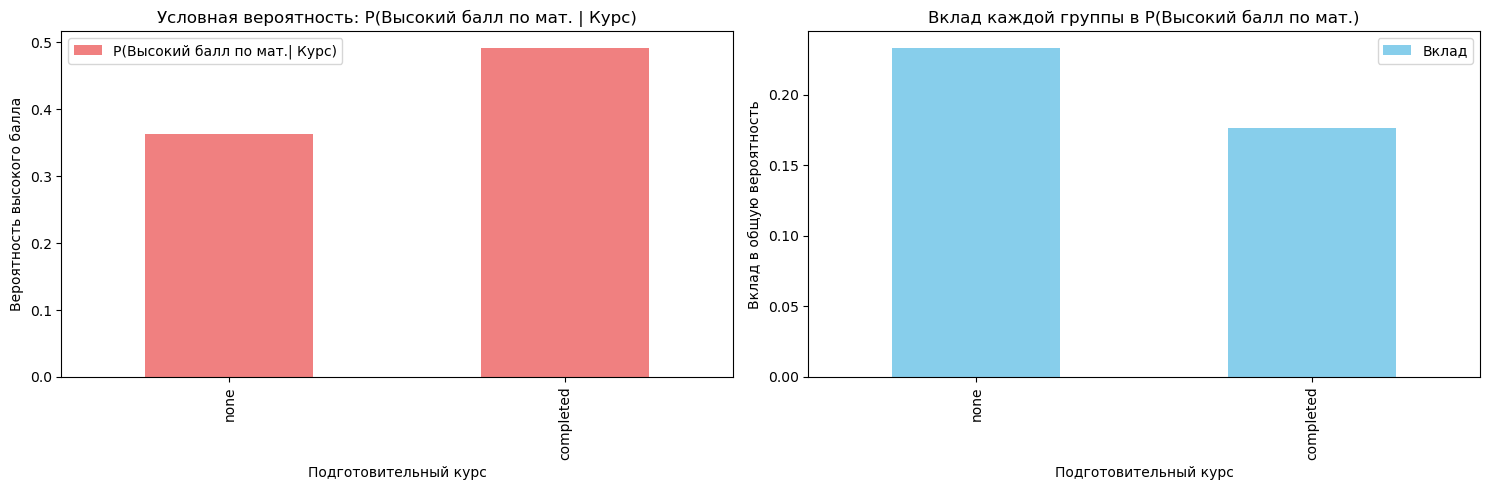

In [19]:
# Визуализируем вклад групп подготовительного курса
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

prob_df.plot(x='Прошел курс', y='P(Высокий балл по мат.| Курс)', kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('Условная вероятность: P(Высокий балл по мат. | Курс)')
ax1.set_ylabel('Вероятность высокого балла')
ax1.set_xlabel('Подготовительный курс')

prob_df.plot(x='Прошел курс', y='Вклад', kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Вклад каждой группы в P(Высокий балл по мат.)')
ax2.set_ylabel('Вклад в общую вероятность')
ax2.set_xlabel('Подготовительный курс')

plt.tight_layout()
plt.show()

## Формула Байеса
Формула Байеса позволяет вычислить условную вероятность события A
при условии наступления события B по формуле:

$$
P(A | B) = \frac{P(A) * P(B | A)}{P(B)}
$$

In [21]:
print("ТЕОРЕМА БАЙЕСА:")
print("P(Курс | Высокий балл по мат.) = P(Высокий балл по мат. | Курс) * P(Курс) / P(Высокий балл по мат.)")
print("=" * 80)

P_high_math = (data['math score'] >= 70).mean()

bayes_results = []

for prep in data['test preparation course'].unique():
    # P(Курс) — априорная вероятность
    P_prep = (data['test preparation course'] == prep).mean()

    P_high_math_if_prep = conditional_probability(
        data,
        condition_col='test preparation course',
        condition_val=prep,
        target_col='math score',
        target_val=70
    )

    P_prep_if_high_math = (
        P_high_math_given_prep * P_prep / P_high_math
    )

    bayes_results.append({
        'Курс': prep,
        'P(Курс)': P_prep,
        'P(Выс. по мат.|Курс)': P_high_math_if_prep,
        'P(Курс|Выс. балл по мат.)': P_prep_if_high_math
    })

bayes_df = pd.DataFrame(bayes_results)

print("Результаты применения теоремы Байеса:")
print(bayes_df.round(3))

ТЕОРЕМА БАЙЕСА:
P(Курс | Высокий балл по мат.) = P(Высокий балл по мат. | Курс) * P(Курс) / P(Высокий балл по мат.)
Результаты применения теоремы Байеса:
        Курс  P(Курс)  P(Выс. по мат.|Курс)  P(Курс|Выс. балл по мат.)
0       none    0.642                 0.363                      0.772
1  completed    0.358                 0.492                      0.430


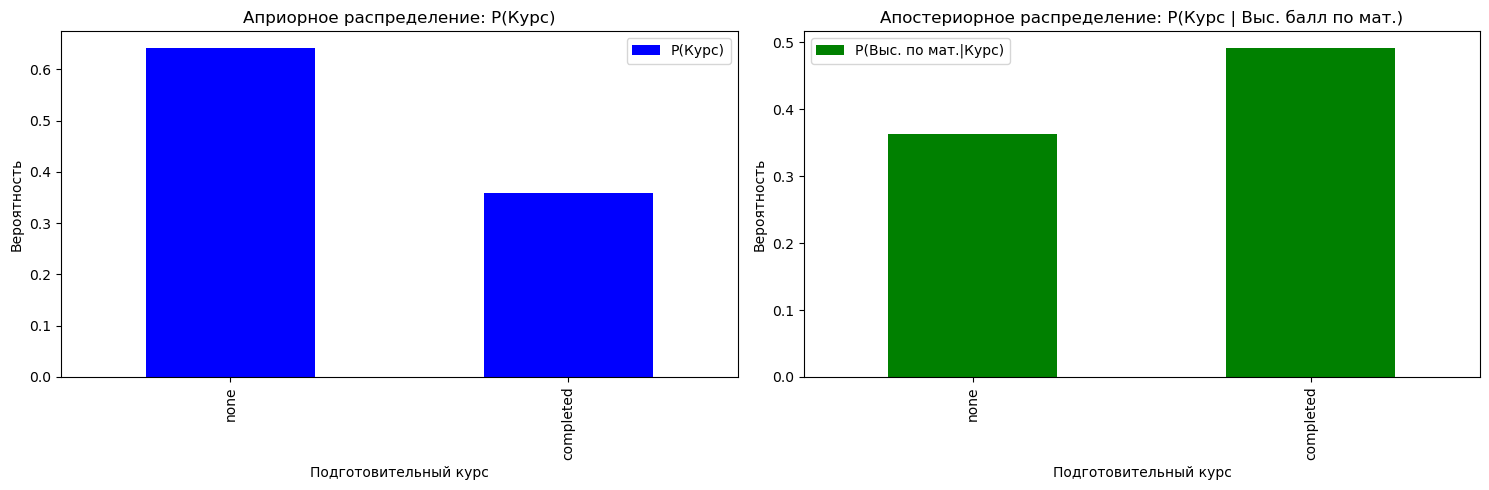

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Априорное распределение
bayes_df.plot(
    x='Курс',
    y='P(Курс)',
    kind='bar',
    ax=ax1,
    color='blue'
)
ax1.set_title(
    'Априорное распределение: P(Курс)'
)
ax1.set_ylabel('Вероятность')
ax1.set_xlabel('Подготовительный курс')

# Апостериорное распределение
bayes_df.plot(
    x='Курс',
    y='P(Выс. по мат.|Курс)',
    kind='bar',
    ax=ax2,
    color='green'
)
ax2.set_title(
    'Апостериорное распределение: P(Курс | Выс. балл по мат.)'
)
ax2.set_ylabel('Вероятность')
ax2.set_xlabel('Подготовительный курс')

plt.tight_layout()
plt.show()